In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from tqdm import tqdm


# sns.set(color_codes=True)

In [7]:
# Make proper file names for Windows
# pip install regex

import re


def windows_filename(s):
    s = str(s).strip().replace(' ', '_')
    return re.sub(r'(?u)[^-\w.]', '', s)

In [6]:
def plot_graph(plt, start_time, variable):
    plt.savefig(windows_filename(start_time)+'_' + variable + '.pdf')

In [5]:
def ftoc(f):
    return (f - 32) * 5.0/9.0


def mphtoms(mph):
    return mph * 0.44704

In [11]:
from pathlib import Path

basePathPatrick = Path(
    "C:/Users/pkastner/Documents/GitHub/HoboPlot")
basePathESL = Path(
    "C:/Users/pkastner/Google Drive/Patrick/OutdoorComfort-Biking/Measurements/Remy/_Stations/")
basePathRemy = Path(
    "C:/Users/remym/Dropbox/Cornell 2019-2020/ESL Independent Study/_Stations")
basePathRemy = Path(
    "C:/Users/remym/Dropbox/Cornell 2019-2020/ESL Independent Study/_StationDataPython")
basePathBenj = Path(
    "C:/Users/pkastner/Google Drive/Patrick/OutdoorComfort-Biking/Measurements/Benjamin_StationFile")

loadPath = basePathPatrick

In [ ]:
from hoboreader import HoboReader
S1 = HoboReader(loadPath / "20191101_11-04_DL1.csv")
S2 = HoboReader(loadPath / "20191101-10-50_DL2.csv")
S3 = HoboReader(loadPath / "20191115-11-08_DL3.csv")
S4 = HoboReader(loadPath / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Variable to plot
variable1 = "Wind Speed"
variable2 = "Wind Direction"

# df1[variable].hist()
sns.distplot(df1[variable1], kde=False, fit=stats.gamma)
sns.distplot(df2[variable1], kde=False, fit=stats.gamma)
sns.distplot(df3[variable1], kde=False, fit=stats.gamma)
sns.distplot(df4[variable1], kde=False, fit=stats.gamma)

#sns.jointplot(x=variable1, y=variable2, data=df1);

In [ ]:
from windrose import WindroseAxes
from windrose import WindAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np


def plotWR(ws, wd):
    ax = WindroseAxes.from_ax()
    ax.contourf(wd, ws, bins=np.arange(0, 6, 1), nsector=36, cmap=cm.hot)
    ax.contour(wd, ws, bins=np.arange(0, 6, 1),
               nsector=36, colors='black', lw=1)
    ax.set_legend()


def printPDF(ws):
    ax = WindAxes.from_ax()
    bins = np.arange(0, 6 + 1, 0.5)
    bins = bins[1:]
    ax, params = ax.pdf(ws, bins=bins)

In [ ]:
list = [df1, df2, df3, df4]

# Variable to plot
variable1 = "Wind Speed"
variable2 = "Wind Direction"

ws = np.array(df1[variable1]).flatten()
wd = np.array(df1[variable2]).flatten()

for i in tqdm(list):
    ws = np.array(i[variable1]).flatten()
    wd = np.array(i[variable2]).flatten()
    plotWR(ws, wd)
    printPDF(ws)

In [12]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(loadPath / "20191101_11-04_DL1.csv")
S2 = HoboReader(loadPath / "20191101-10-50_DL2.csv")
S3 = HoboReader(loadPath / "20191115-11-08_DL3.csv")
S4 = HoboReader(loadPath / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-17 06:00:00-04:00'
end_time = '2019-10-17 19:00:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (15, 5)

# Change lineweights
lineweights = 2

# Variable to plot
variable = 'Solar Radiation'

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='blue')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='yellow', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='red', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='magenta', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Global Radiation $[W/m^2]$')
plt.xlabel("Time")

# Title
ax.set_title(variable)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

In [13]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(loadPath / "20191101_11-04_DL1.csv")
S2 = HoboReader(loadPath / "20191101-10-50_DL2.csv")
S3 = HoboReader(loadPath / "20191115-11-08_DL3.csv")
S4 = HoboReader(loadPath / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-17 06:00:00-04:00'
end_time = '2019-10-17 19:00:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (15, 5)

# Change lineweights
lineweights = 2

# Variable to plot
variable = "Wind Speed"

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='blue')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='yellow', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='red', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='magenta', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Wind velocity $[m/s]$')
plt.xlabel("Time")

# Title
ax.set_title(variable)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

In [15]:
# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


# "#","Date Time, GMT-04:00",
#"Temp, °F (LGR S/N: 20702490, SEN S/N: 20496098, LBL: MRT)",
#"Temp, °F (LGR S/N: 20702490, SEN S/N: 20698454, LBL: Drybulb)",
#"RH, % (LGR S/N: 20702490, SEN S/N: 20698454)",
#"Solar Radiation, W/m² (LGR S/N: 20702490, SEN S/N: 20702165, LBL: Rad)",
#"Wind Speed, mph (LGR S/N: 20702490, SEN S/N: 20706788, LBL: Wind)",
#"Gust Speed, mph (LGR S/N: 20702490, SEN S/N: 20706788)",
#"Wind Direction, ø (LGR S/N: 20702490, SEN S/N: 20706788)",
#"DewPt, °F (LGR S/N: 20702490, SEN S/N: 20698454)"


S4 = HoboReader(loadPath / "20191101-12-58_DL4.csv")


df4 = S4.get_dataframe()

# Select time

start_time = '2019-09-01 06:00:00-04:00'
end_time = '2019-12-15 19:00:00-04:00'


df4_ = df4.loc[start_time:end_time]

# Resize figure
custom_figsize = (25, 5)

# Change lineweights
lineweights = 2


# Variable to plot
variable = "Temp"
variable2 = "Temp"


test = df4_[variable].subtract(df4_[variable2], fill_value=0)


print(test)


# Plot two dataframes into one plot
#ax = plt.plot(diff,lw = lineweights, figsize=custom_figsize,color='blue')
#
# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/
#
# Legend
# ax.legend([
#"DL1 - Stone Garden - Tjaden Hall",
#"DL2 - PSB Parking Lot",
#"DL3 - Olin Library",
#"DL4 - Milstein Hall Roof "
# ],loc='upper left', frameon=False)
#
# Fix xticks
#
# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# days = mdates.DayLocator()  # every minute
# hours = mdates.HourLocator()  # every minute
# minutes = mdates.MinuteLocator()  # every minute
#
#days_fmt = mdates.DateFormatter('%d')
#hours_fmt = mdates.DateFormatter('%H:00')
#
# format the ticks
# ax.xaxis.set_major_locator(hours)
# ax.xaxis.set_major_formatter(hours_fmt)
# ax.xaxis.set_minor_locator(hours)
#
# Labels
#plt.ylabel('Wind velocity $[m/s]$')
# plt.xlabel("Time")
#
# Title
# ax.set_title(variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101-12-58_DL4.csv'

In [17]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(loadPath / "20191101_11-04_DL1.csv")
S2 = HoboReader(loadPath / "20191101-10-50_DL2.csv")
S3 = HoboReader(loadPath / "20191115-11-08_DL3.csv")
S4 = HoboReader(loadPath / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-17 06:00:00-04:00'
end_time = '2019-10-17 19:00:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (15, 5)

# Change lineweights
lineweights = 2

# Variable to plot
variable = "Wind Direction"

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='blue')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='yellow', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='red', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='magenta', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Wind direction $[°]$')
plt.xlabel("Time")

# Title
ax.set_title(variable)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

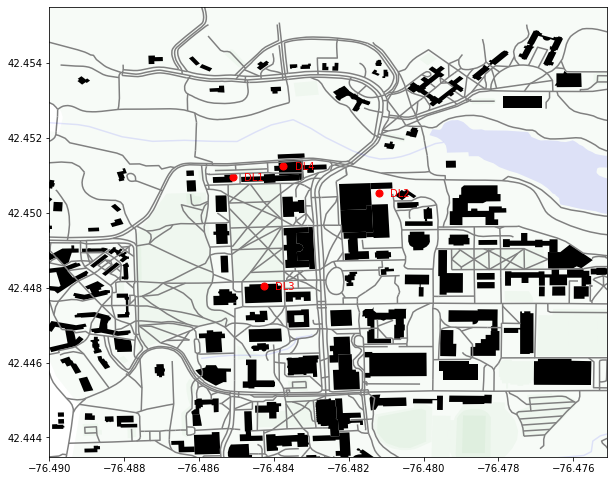

In [19]:
# conda install -c https://conda.anaconda.org/ioos geopandas
# conda install -c conda-forge shapely
# conda install -c conda-forge descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

#final_crs = {'init': 'epsg:28992'}

buildings = gpd.read_file(
    'Ithaca/map/buildings-polygon.shp')  # .to_crs(final_crs)
roads = gpd.read_file('Ithaca/map/roads-line.shp')  # .to_crs(final_crs)
landcover = gpd.read_file(
    'Ithaca/map/landcover-polygon.shp')  # .to_crs(final_crs)
# .to_crs(final_crs)
water = gpd.read_file('Ithaca/map/water_areas-polygon.shp')
waterlines = gpd.read_file(
    'Ithaca/map/water_lines-line.shp')  # .to_crs(final_crs)

fig, ax = plt.subplots(figsize=(10, 10))

roads.plot(ax=ax, color="grey")
landcover.plot(ax=ax, color="green", alpha=0.03)
water.plot(ax=ax, color="blue", alpha=0.1)
waterlines.plot(ax=ax, color="blue", alpha=0.1)
buildings.plot(ax=ax, color="black")

minx, miny, maxx, maxy = -76.4900, 42.443484, -76.475089, 42.4555
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

DL1 = Point((-76.485089, 42.450960))
DL2 = Point((-76.481194, 42.450536))
DL3 = Point((-76.484268, 42.448039))
DL4 = Point((-76.483743, 42.451245))

gdf_stations = gpd.GeoSeries([DL1, DL2, DL3, DL4])
gdf_stations.plot(ax=ax, markersize=50, color="red", marker="o")

# Annotate with names

stations = [
    "DL1",
    "DL2",
    "DL3",
    "DL4"
]
xx = 0.0003
yy = 0.0001

for i, geo in gdf_stations.centroid.iteritems():
    ax.annotate(s=stations[i], xy=[geo.x+xx, geo.y-yy], color="red")


# Save PDF
plt.savefig('Map.pdf')

In [20]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(basePathPatrick / "20191101_11-04_DL1.csv")
S2 = HoboReader(basePathPatrick / "20191101-10-50_DL2.csv")
S3 = HoboReader(basePathPatrick / "20191115-11-08_DL3.csv")
S4 = HoboReader(basePathPatrick / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-31 00:00:00-04:00'
end_time = '2019-11-01 23:59:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (40, 15)

# Change lineweights
lineweights = 1.5

# Variable to plot
variable = "Wind Direction"

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='red')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='blue', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='green', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='aqua', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Wind direction $[°]$', fontname="Consolas", fontsize=20)
plt.xlabel("Time", fontname="Consolas", fontsize=20)

# Title
ax.set_title(variable, fontname="Consolas", fontsize=28)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

In [22]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(basePathPatrick / "20191101_11-04_DL1.csv")
S2 = HoboReader(basePathPatrick / "20191101-10-50_DL2.csv")
S3 = HoboReader(basePathPatrick / "20191115-11-08_DL3.csv")
S4 = HoboReader(basePathPatrick / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-31 00:00:00-04:00'
end_time = '2019-11-01 23:59:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (40, 15)

# Change lineweights
lineweights = 1.5

# Variable to plot
variable = "Wind Speed"

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='red')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='blue', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='green', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='aqua', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Wind Speed $[MPH]$', fontname="Consolas", fontsize=20)
plt.xlabel("Time", fontname="Consolas", fontsize=20)

# Title
ax.set_title(variable, fontname="Consolas", fontsize=28)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

In [1]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(basePathPatrick / "20191101_11-04_DL1.csv")
S2 = HoboReader(basePathPatrick / "20191101-10-50_DL2.csv")
S3 = HoboReader(basePathPatrick / "20191115-11-08_DL3.csv")
S4 = HoboReader(basePathPatrick / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-31 00:00:00-04:00'
end_time = '2019-11-01 23:59:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (40, 15)

# Change lineweights
lineweights = 2

# Variable to plot
variable = 'Solar Radiation'

# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='red')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='blue', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='green', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='aqua', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Global Radiation $[W/m^2]$', fontname="Consolas", fontsize=20)
plt.xlabel("Time", fontname="Consolas", fontsize=20)

# Title
ax.set_title(variable, fontname="Consolas", fontsize=28)

# Save PDF
plot_graph(plt, start_time, variable)

NameError: name 'basePathPatrick' is not defined

In [23]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof


S1 = HoboReader(basePathPatrick / "20191101_11-04_DL1.csv")
S2 = HoboReader(basePathPatrick / "20191101-10-50_DL2.csv")
S3 = HoboReader(basePathPatrick / "20191115-11-08_DL3.csv")
S4 = HoboReader(basePathPatrick / "20191101-12-58_DL4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

# Select time

start_time = '2019-10-31 00:00:00-04:00'
end_time = '2019-11-01 23:59:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

# df1.index

# Print Headers
# print(df1.columns.values)


# Resize figure
custom_figsize = (40, 15)

# Change lineweights
lineweights = 1.5

# Variable to plot
variable = "Temp"

# Translate to °C

df1_[variable] = df1_[variable].apply(lambda x: f2c(x), axis=1)
df2_[variable] = df2_[variable].apply(lambda x: f2c(x), axis=1)
df3_[variable] = df3_[variable].apply(lambda x: f2c(x), axis=1)
df4_[variable] = df4_[variable].apply(lambda x: f2c(x), axis=1)


# Plot two dataframes into one plot
ax = df1_.plot(y=[variable], lw=lineweights,
               figsize=custom_figsize, color='red')
df3_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='blue', ax=ax)
df2_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='green', ax=ax)
df4_.plot(y=[variable], lw=lineweights,
          figsize=custom_figsize, color='aqua', ax=ax)

# Subset Time Series By Dates Python Using Pandas
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
    "DL1 - Stone Garden - Tjaden Hall",
    "DL2 - PSB Parking Lot",
    "DL3 - Olin Library",
    "DL4 - Milstein Hall Roof "
], loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

# Labels
plt.ylabel('Temp $[°C]$', fontname="Consolas", fontsize=20)
plt.xlabel("Time", fontname="Consolas", fontsize=20)

# Title
ax.set_title(variable, fontname="Consolas", fontsize=28)

# Save PDF
plot_graph(plt, start_time, variable)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pkastner\\Documents\\GitHub\\HoboPlot\\20191101_11-04_DL1.csv'

In [ ]:
# conda install -c https://conda.anaconda.org/ioos geopandas
# conda install -c conda-forge shapely
# conda install -c conda-forge descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

#final_crs = {'init': 'epsg:28992'}

buildings = gpd.read_file(
    'Ithaca/map/buildings-polygon.shp')  # .to_crs(final_crs)
roads = gpd.read_file('Ithaca/map/roads-line.shp')  # .to_crs(final_crs)
landcover = gpd.read_file(
    'Ithaca/map/landcover-polygon.shp')  # .to_crs(final_crs)
# .to_crs(final_crs)
water = gpd.read_file('Ithaca/map/water_areas-polygon.shp')
waterlines = gpd.read_file(
    'Ithaca/map/water_lines-line.shp')  # .to_crs(final_crs)

fig, ax = plt.subplots(figsize=(10, 10))

roads.plot(ax=ax, color="grey")
landcover.plot(ax=ax, color="green", alpha=0.03)
water.plot(ax=ax, color="blue", alpha=0.1)
waterlines.plot(ax=ax, color="blue", alpha=0.1)
buildings.plot(ax=ax, color="black")

minx, miny, maxx, maxy = -76.4900, 42.443484, -76.475089, 42.4555
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

DL1 = Point((-76.485089, 42.450960))
DL2 = Point((-76.481194, 42.450536))
DL3 = Point((-76.484268, 42.448039))
DL4 = Point((-76.483743, 42.451245))

gdf_stations = gpd.GeoSeries([DL1, DL2, DL3, DL4])
gdf_stations.plot(ax=ax, markersize=50, color="red", marker="o")

# Annotate with names

stations = [
    "DL1",
    "DL2",
    "DL3",
    "DL4"
]
xx = 0.0003
yy = 0.0001

for i, geo in gdf_stations.centroid.iteritems():
    ax.annotate(s=stations[i], xy=[geo.x+xx, geo.y-yy], color="red")


# Save PDF
plt.savefig('Map.pdf')

C:\Users\pkastner\Anaconda3\envs\hobo\lib\site-packages\IPython\core\interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


interactive(children=(IntSlider(value=4, description='variable_id', max=8, min=1), IntSlider(value=16, descrip…

<function __main__.f(variable_id, d, m, y)>

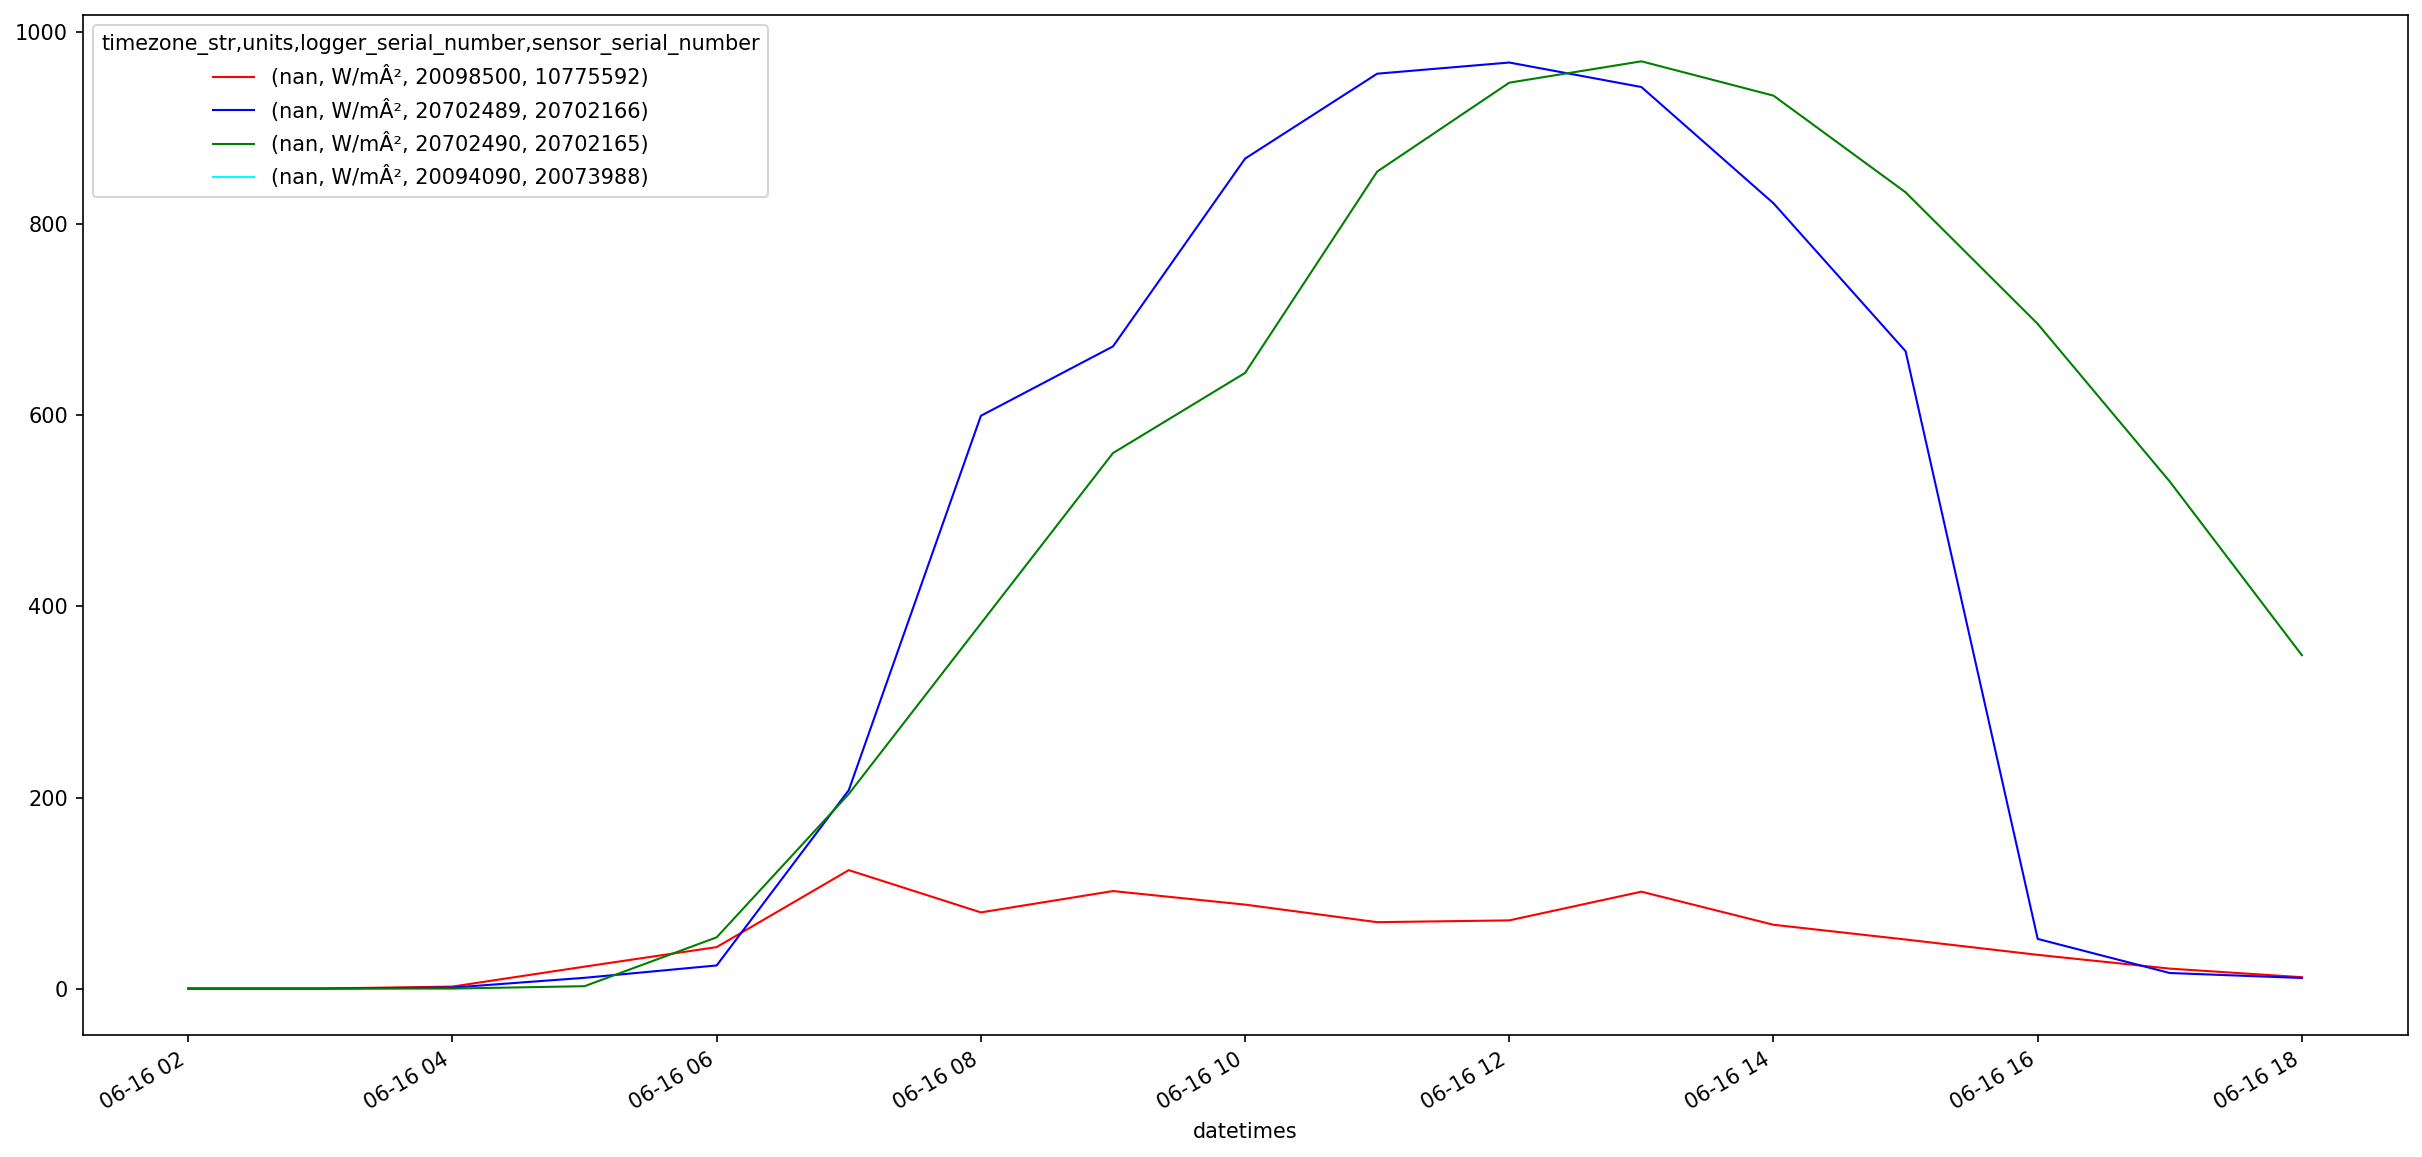

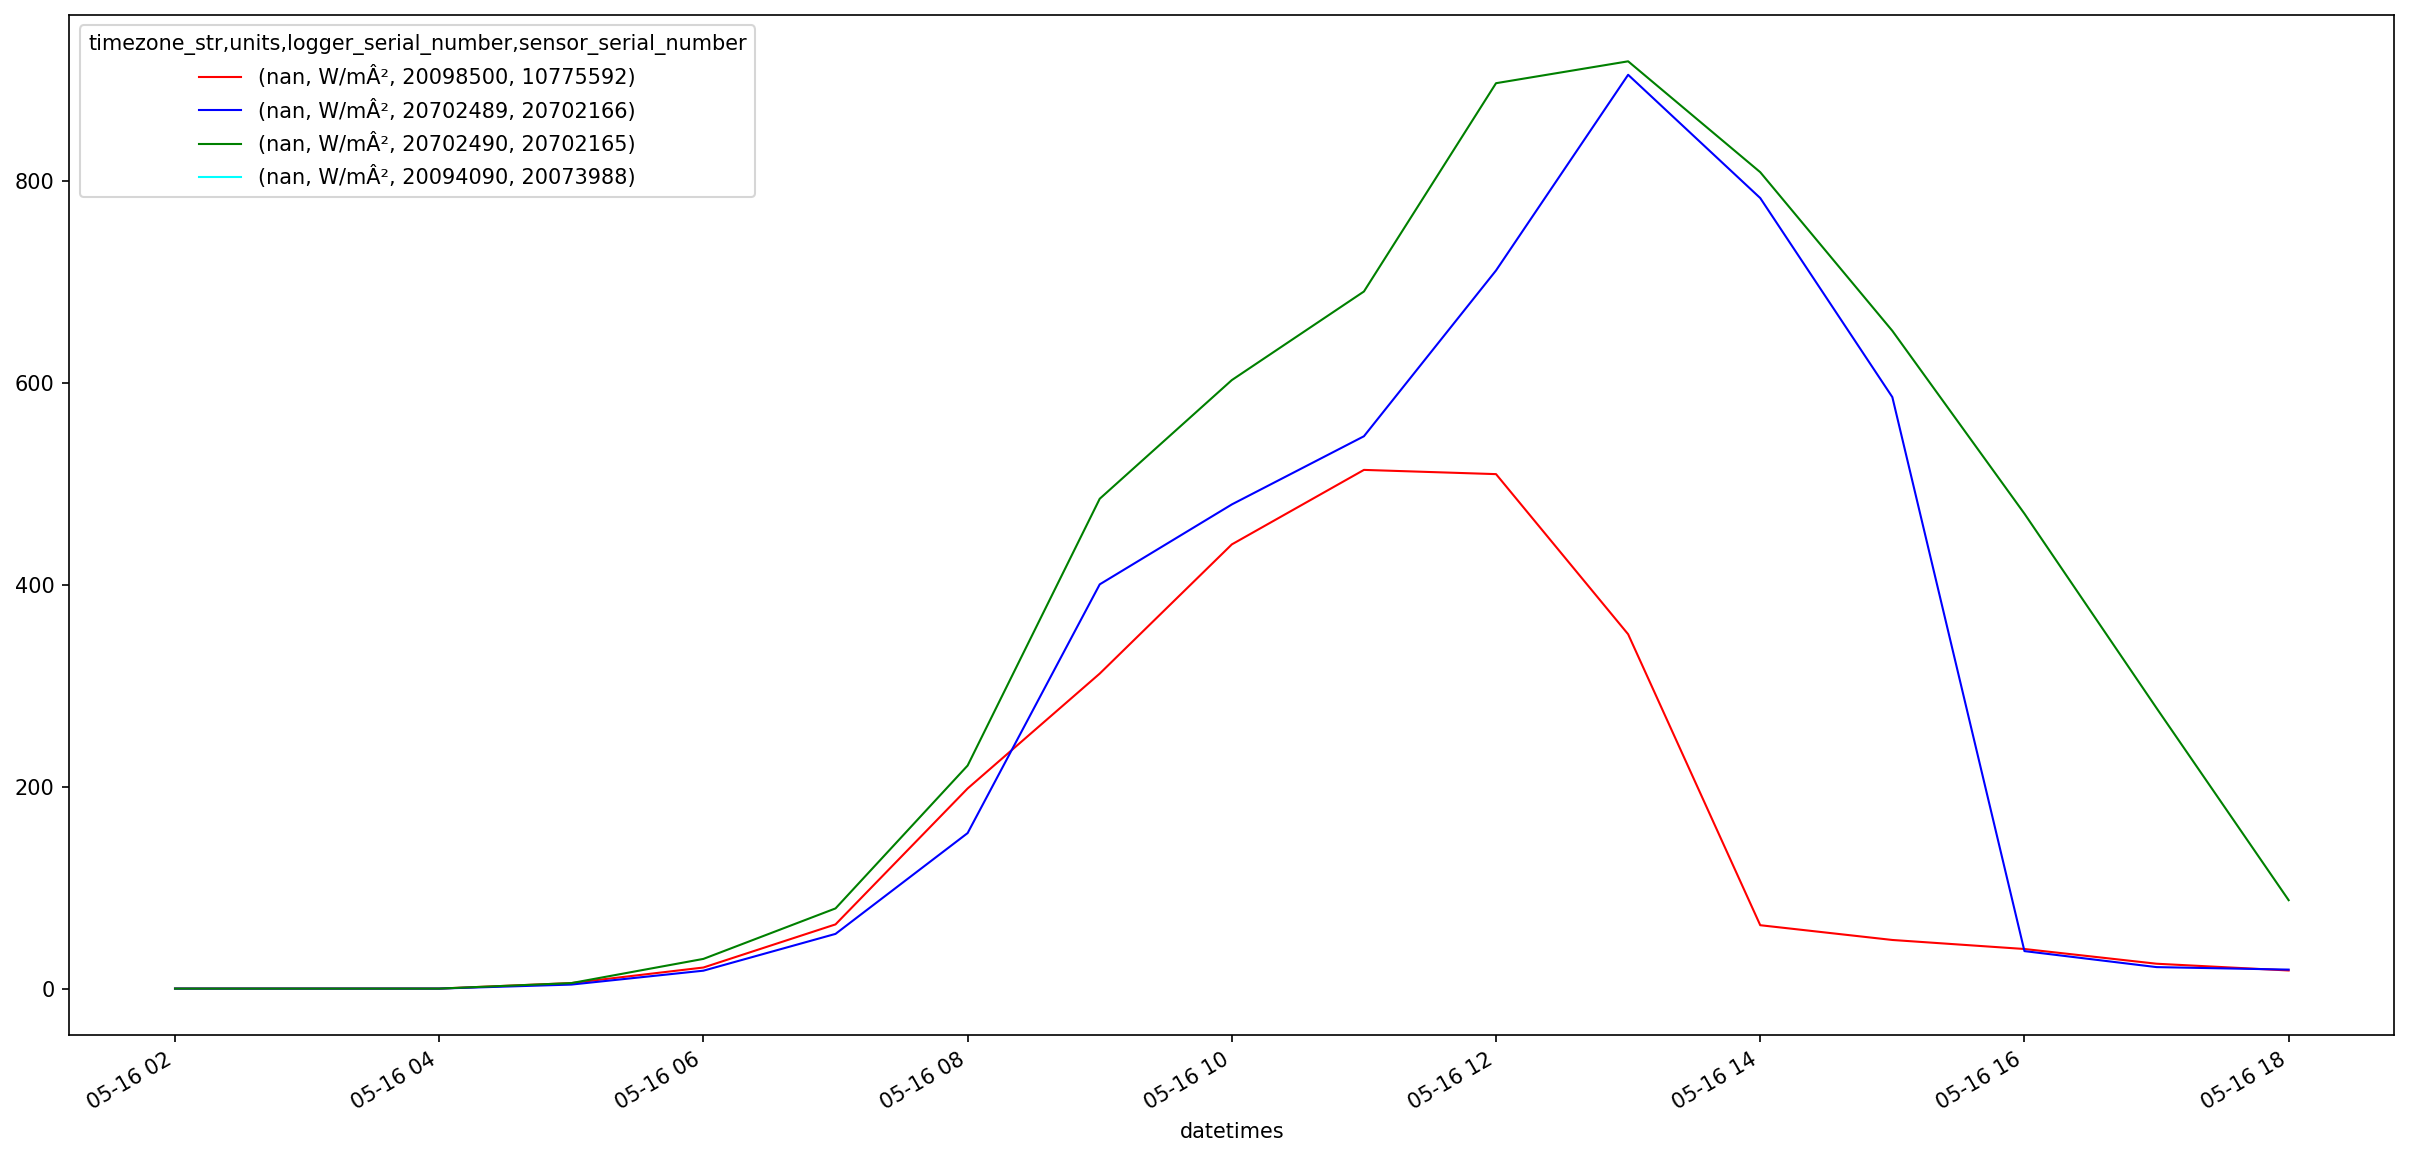

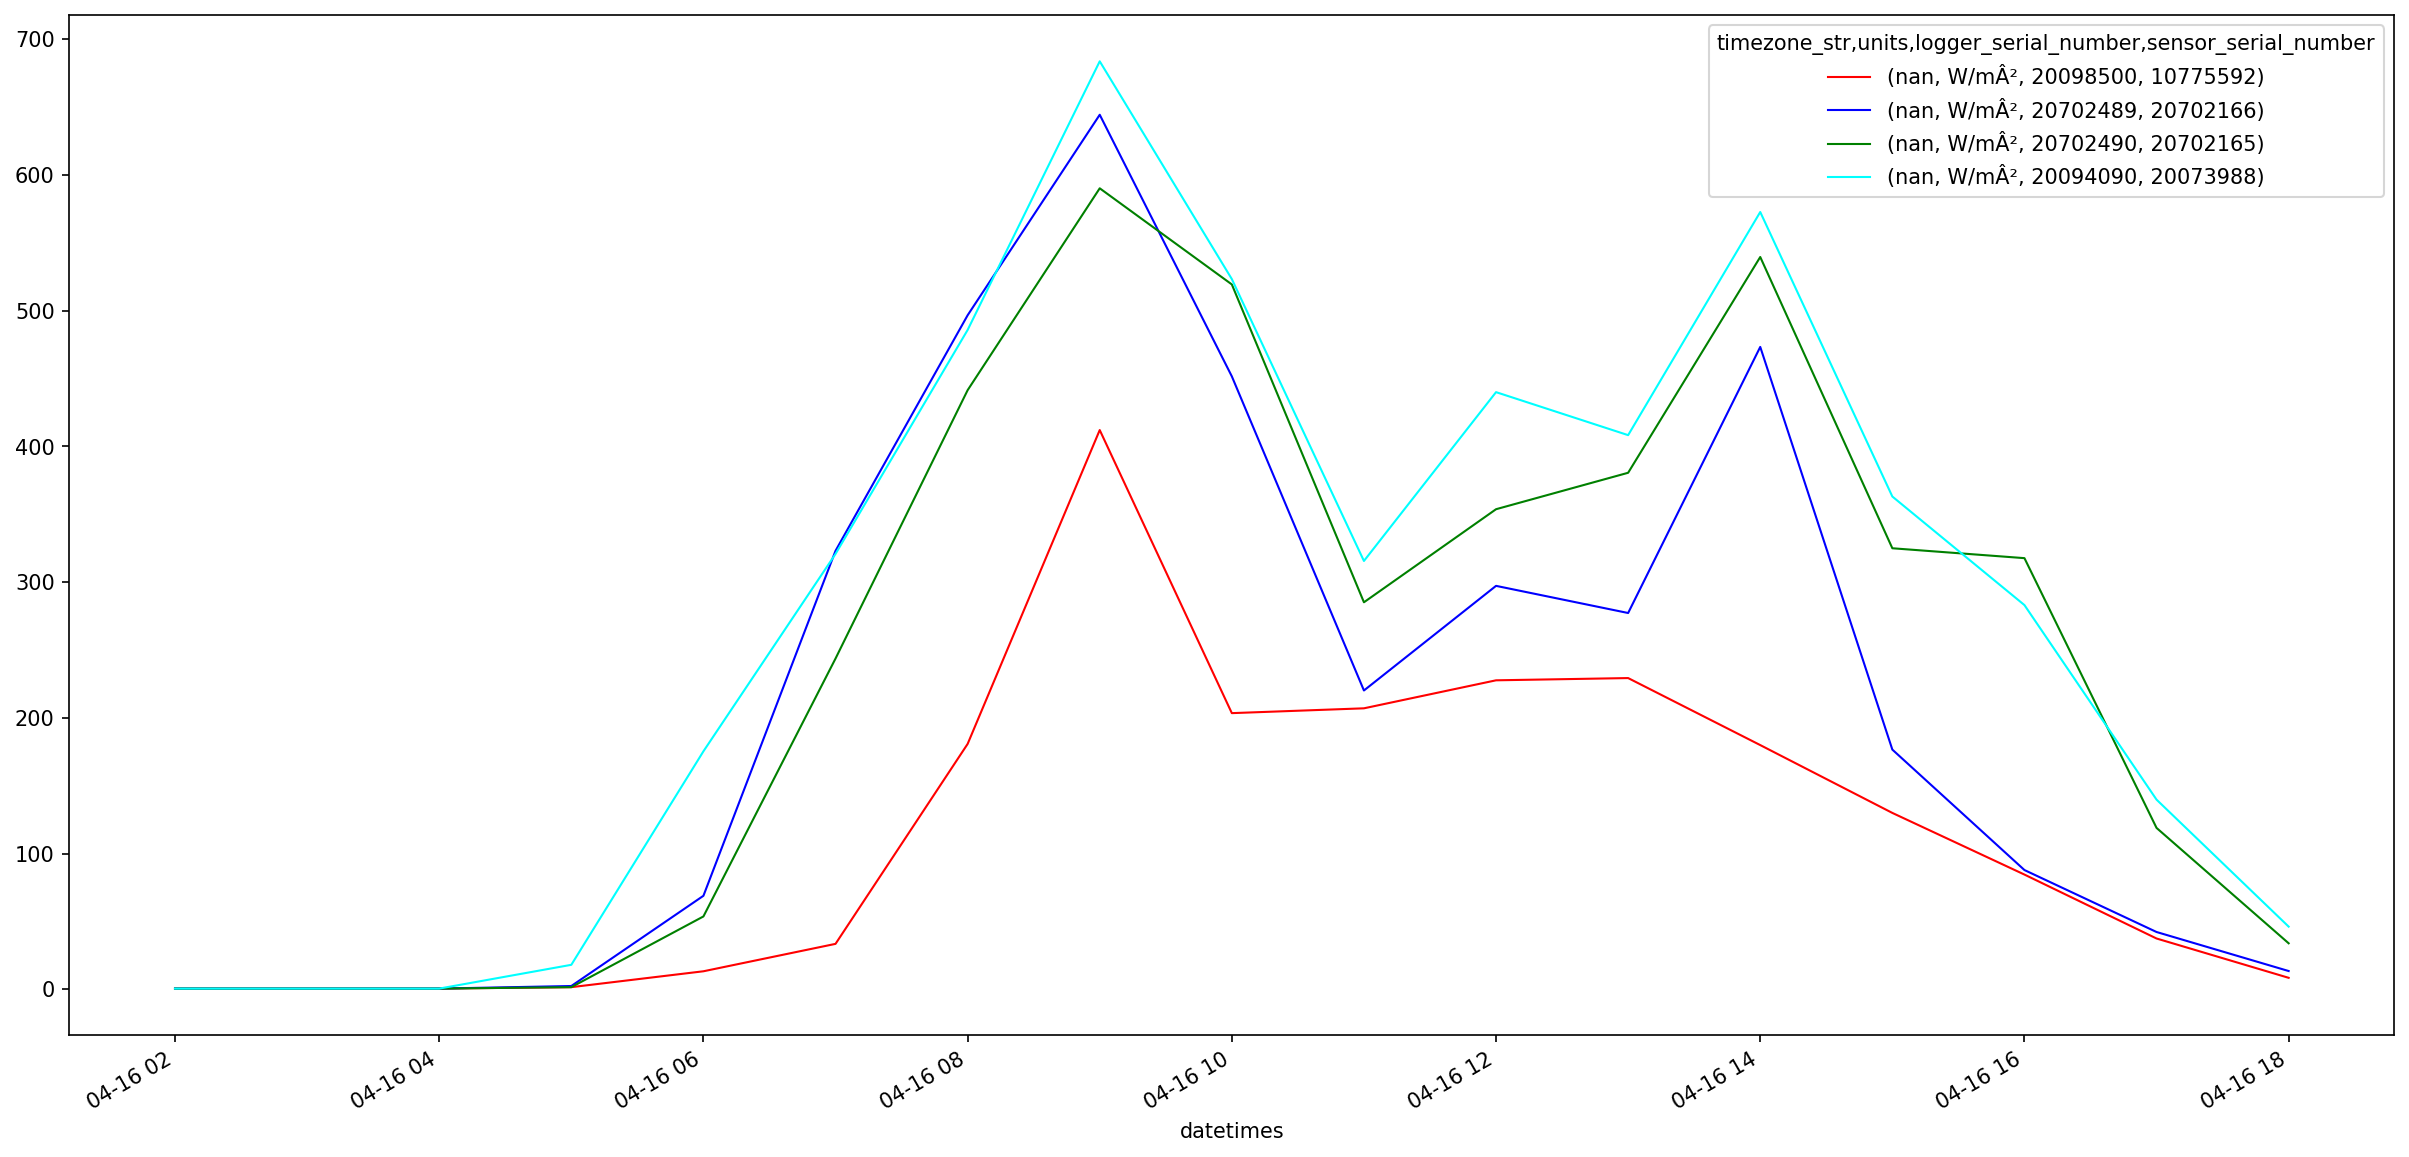

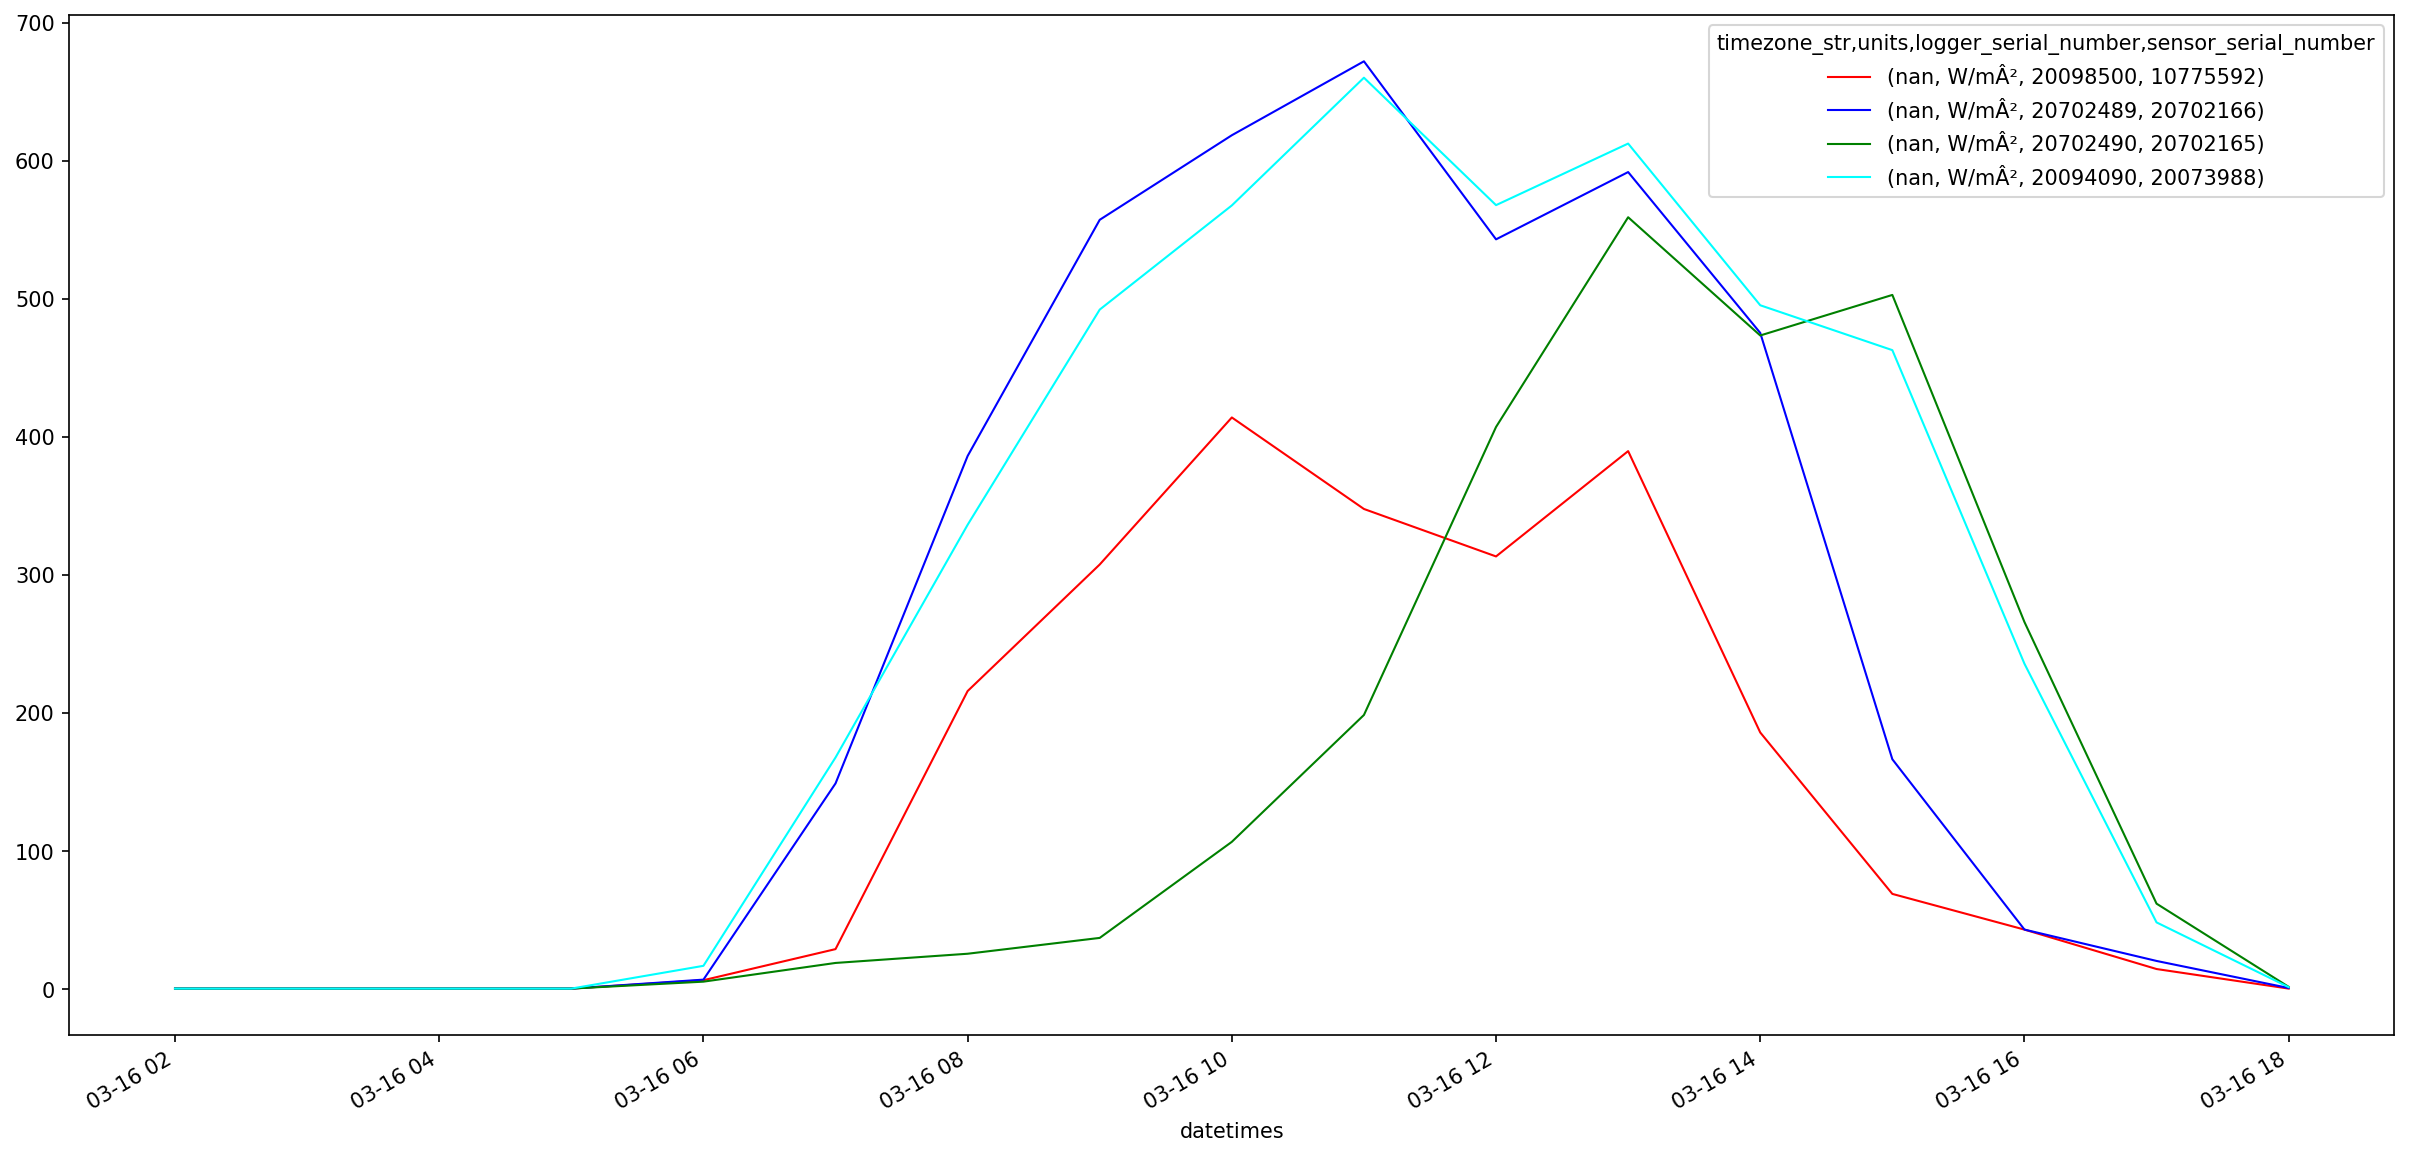

In [25]:
# Merge all recorded data


from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
%matplotlib inline


pd.set_option('mode.chained_assignment', None)

# Set up figure size and DPI for screen demo
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150


# loadPath = Path(r"C:\Users\remym\Dropbox\ESL\CSV Merged Data")
# loadPath = Path(r"C:\Users\pkastner\Google Drive\Patrick\OutdoorComfort-Biking\Measurements")

# S1=HoboReader(loadPath / "DL1_Stone_Garden_Tjaden_Hall.csv")
# S2=HoboReader(loadPath / "DL2_PSB_Parking_Lot.csv")
# S3=HoboReader(loadPath / "DL3_Olin_Library.csv")
# S4=HoboReader(loadPath / "DL4_Milstein_Hall_Roof.csv")
# S5=HoboReader(LoadPath / "DL5_Game_Farm_Road_20192020v4.csv")


# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof
# DL5	Game Farm Road


S1 = HoboReader("DL1_Stone_Garden_Tjaden_Hall.csv")
S2 = HoboReader("DL2_PSB_Parking_Lot.csv")
S3 = HoboReader("DL3_Olin_Library.csv")
S4 = HoboReader("DL4_Milstein_Hall_Roof.csv")
S5 = HoboReader("DL5_Game_Farm_Road_20192020v4.csv")


df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()
df5 = S5.get_dataframe()

# DF5 (GAME FARM ROAD) HAS TO BE SHIFTED 1HR BACK BECAUSE IT NATIVELY RECORDS DST, OUR STATIONS DO NOT.
# THE OTHER STATIONS ARE NOT SHIFTED (HENCE 0 VALUE FOR PERIODS), JUST THERE FOR SANITY

df5 = df5.shift(periods=(-1), fill_value=0)
df4 = df4.shift(periods=(0), fill_value=0)
df3 = df3.shift(periods=(0), fill_value=0)
df2 = df2.shift(periods=(0), fill_value=0)
df1 = df1.shift(periods=(0), fill_value=0)

# Resample subhourly data to 1 hourly graph (OUR STATIONS RECORD IN 10MIN INTERVALS, GFR IN 1HR, RESAMPLE FOR EASY COMPARISON. CAN TURN OFF)
df1 = df1.resample('H').mean()
df2 = df2.resample('H').mean()
df3 = df3.resample('H').mean()
df4 = df4.resample('H').mean()
df5 = df5.resample('H').mean()

# CONVERT IMPERIAL TO METRIC UNITS


def ftoc(f):
    try:
        return (f - 32) * 5.0/9.0
    except: 
        print('Problem')


def mphtoms(mph):
    try:
        return mph * 0.44704
    except: 
        print('Problem')


def f(variable_id, d, m, y):

    start_time = str(y)+'-'+str(m)+'-'+str(d)+' 07:00:00-00:00'
    end_time = str(y)+'-'+str(m)+'-'+str(d)+' 23:00:00-00:00'

    df1_ = df1.loc[start_time:end_time]
    df2_ = df2.loc[start_time:end_time]
    df3_ = df3.loc[start_time:end_time]
    df4_ = df4.loc[start_time:end_time]
    df5_ = df5.loc[start_time:end_time]

    # Translate to °C

  
    df1_["Temp"] = df1_["Temp"].apply(lambda x: ftoc(x), axis=1)
    df2_["Temp"] = df2_["Temp"].apply(lambda x: ftoc(x), axis=1)
    df3_["Temp"] = df3_["Temp"].apply(lambda x: ftoc(x), axis=1)
    df4_["Temp"] = df4_["Temp"].apply(lambda x: ftoc(x), axis=1)

    df1_["MRT"] = df1_["MRT"].apply(lambda x: ftoc(x), axis=1)
    df2_["MRT"] = df2_["MRT"].apply(lambda x: ftoc(x), axis=1)
    df3_["MRT"] = df3_["MRT"].apply(lambda x: ftoc(x), axis=1)
    df4_["MRT"] = df4_["MRT"].apply(lambda x: ftoc(x), axis=1)
    

    # Translate to m/s

    df1_["Wind Speed"] = df1_["Wind Speed"].apply(lambda x: mphtoms(x), axis=1)
    df2_["Wind Speed"] = df2_["Wind Speed"].apply(lambda x: mphtoms(x), axis=1)
    df3_["Wind Speed"] = df3_["Wind Speed"].apply(lambda x: mphtoms(x), axis=1)
    df4_["Wind Speed"] = df4_["Wind Speed"].apply(lambda x: mphtoms(x), axis=1)
    #df5_["Wind Speed"] = df5_["Wind Speed"].apply(lambda x: mphtoms(x), axis=1)
    
    df1_["Gust Speed"] = df1_["Gust Speed"].apply(lambda x: mphtoms(x), axis=1)
    df2_["Gust Speed"] = df2_["Gust Speed"].apply(lambda x: mphtoms(x), axis=1)
    df3_["Gust Speed"] = df3_["Gust Speed"].apply(lambda x: mphtoms(x), axis=1)
    df4_["Gust Speed"] = df4_["Gust Speed"].apply(lambda x: mphtoms(x), axis=1)
    #df5_["Gust Speed"] = df5_["Gust Speed"].apply(lambda x: mphtoms(x), axis=1)
   

    # df1.index

    # Print Headers
    # print(df1.columns.values)

    # Resize figure
    custom_figsize = (20, 10)

    # Change lineweights
    lineweights = 1.5

    variables = ["Wind Speed", "MRT", "Temp", "RH", "Solar Radiation",
        "Wind Speed", "Gust Speed", "Wind Direction", "DewPt"]

    variable = variables[variable_id]

    # Plot both temp and mrt when temp is selected

    if variable == "MRT" or variable == "DewPt" or variable == "Gust Speed":
        ax = df1_.plot(y=variable, lw=1, figsize=custom_figsize, color='red')
        df2_.plot(y=variable, lw=1, figsize=custom_figsize,
                   color='blue', ax=ax)
        df3_.plot(y=variable, lw=1, figsize=custom_figsize,
                   color='green', ax=ax)
        df4_.plot(y=variable, lw=1, figsize=custom_figsize, color='aqua', ax=ax)

    elif variable == "Temp":
        # Plot two dataframes into one plot
        ax = df1_.plot(y=variable, lw=2, figsize=custom_figsize, color='red')
        df2_.plot(y=variable,    lw=2, figsize=custom_figsize, color='blue', ax=ax)
        df3_.plot(y = variable,     lw=2, figsize=custom_figsize,color='green',ax=ax)
        df4_.plot(y = variable,     lw=2, figsize=custom_figsize,color='aqua',ax=ax)
        df5_.plot(y = variable,     lw=3.5, figsize=custom_figsize,color='black',ax=ax)

        ax = df1_.plot(y = "MRT", lw=1, figsize=custom_figsize,style = ['--'],color='red', ax=ax)
        df2_.plot( y = "MRT",     lw=1, figsize=custom_figsize, style = ['--'],color='blue',ax=ax)
        df3_.plot(y = "MRT",      lw=1, figsize=custom_figsize, style = ['--'],color='green',ax=ax)
        df4_.plot(y = "MRT",      lw=1, figsize=custom_figsize, style = ['--'],color='aqua',ax=ax)      
                   
    else:  
         # Plot two dataframes into one plot
        ax = df1_.plot(y = variable, lw=1, figsize=custom_figsize,color='red')
        df2_.plot( y = variable, lw=1, figsize=custom_figsize,color='blue',ax=ax)
        df3_.plot(y = variable, lw=1, figsize=custom_figsize,color='green',ax=ax)
        df4_.plot(y = variable, lw=1, figsize=custom_figsize,color='aqua',ax=ax)
        df5_.plot(y = variable, lw=2, figsize=custom_figsize,color='black',ax=ax)
     
     # Legend
    ax.legend([
       "DL1 - Stone Garden - Tjaden Hall", 
       "DL2 - PSB Parking Lot",
       "DL3 - Olin Library",
       "DL4 - Milstein Hall Roof ",
       "DL5 - Game Farm Road"
       
       ],loc='upper left', frameon=False)

    

    
    
    # Fix xticks
    
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()  # every minute
    hours = mdates.HourLocator()  # every minute
    minutes = mdates.MinuteLocator()  # every minute
    
    days_fmt = mdates.DateFormatter('%d')
    hours_fmt = mdates.DateFormatter('%H:00')
    
    # format the ticks
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hours_fmt)
    ax.xaxis.set_minor_locator(hours)
    
    # Labels
    plt.ylabel(variable, fontname="Consolas", fontsize=20)
    plt.xlabel("UTC Time", fontname="Consolas", fontsize=20)
         
    # Title
    ax.set_title(str(start_time.split(' ')[0]+" "+variable), fontname="Consolas", fontsize=28)
    
    # Save PDF
    # plot_graph(plt, start_time, variable)

    
# Variable to plot
# 1 = "MRT °C"
# 2 = "Temp °C"
# 3 = "RH"
# 4 = "Solar Radiation"
# 5 = "Wind Speed"
# 6 = "Gust Speed"
# 7 = "Wind Direction"
# 8 = "DewPt"
    
    
interact(f,variable_id=(1,8,1), d=(1,31,1), m=(1,12,1), y = (2019,2021,1))

In [ ]:
#Export

y = 2019
m = 1
d = 1

yy = y
mm = 12
dd = 31

start_time = str(y)+'-'+str(m)+'-'+str(d)+' 07:00:00-00:00'
end_time = str(yy)+'-'+str(mm)+'-'+str(dd)+' 23:00:00-00:00'

df = S2.get_dataframe()['MRT']
df_2019 = df.loc[start_time:end_time].apply(lambda x: ftoc(x), axis=1).resample('H').mean()
df_2019.index = df_2019.index.map(lambda x: to_hour_of_year(x.hour, x.day, x.month))

df_2019.to_csv('ValidationTest/mrt.csv',index_label = ['hour_of_year'], header = [ 'MRT'])

y = 2019
m = 1
d = 1

yy = y
mm = 12
dd = 31

start_time = str(y)+'-'+str(m)+'-'+str(d)+' 07:00:00-00:00'
end_time = str(yy)+'-'+str(mm)+'-'+str(dd)+' 23:00:00-00:00'

df = S2.get_dataframe()['Solar Radiation']
df_2019 = df.loc[start_time:end_time].apply(lambda x: ftoc(x), axis=1).resample('H').mean()
df_2019.index = df_2019.index.map(lambda x: to_hour_of_year(x.hour, x.day, x.month))

df_2019.to_csv('ValidationTest/solarradiation.csv',index_label = ['hour_of_year'], header = [ 'Solar Radiation'])

In [194]:
def to_hour_of_year(hour, day, month):
    # count from 1
    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    m = sum(days_in_month[:month - 1]) * 24
    d = (day - 1) * 24
    h = hour 

    return m + d + h

In [112]:
def get_eval_hours(hour_start, hour_end, day_start, day_end, month_start,
                   month_end):
    #count from 1
    if (month_end > 12):
        month_end = 12
    if (day_end > 31):
        day_end = 31
    if (hour_end > 24):
        hour_end = 24

    cnt = 0 
    hoursToEvaluate = []

    for m in range(12):  # 0-11
        for d in range(31):  #0-30
            for h in range(24):  # 0-23

                # Check if already gone through month

                if (m == 2 and d > 27):
                    continue
                elif ((m == 4 or m == 6 or m == 9 or m == 10) and d > 29):
                    continue

                # Fill list
                cnt += 1

                if (m >= month_start and m < month_end and d >= day_start
                        and d < day_end and h >= hour_start and h < hour_end):

                    hoursToEvaluate.append(cnt)

    return hoursToEvaluate

len(get_eval_hours(0, 24, 0, 31, 0, 12))

8760

In [ ]:
from pprint import pprint
import pandas as pd

S2 = HoboReader("DL2_PSB_Parking_Lot.csv")
df2 = S2.get_dataframe()

df2 = df2.resample('H').mean()
display(df2)

print(df2)


df2.to_csv('DL2_PSB.csv')

# Direct/Diffuse split


We need the extra terrestrial radiation for the diffuse part which we can get with "get_extra_radiation()".

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.get_extra_radiation.html?highlight=dni_extra%20

From there, we can use "reindl()" to calculate the split.

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.reindl.html?highlight=reindl


https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/plane-of-array-poa-irradiance/

In [ ]:
# GAME FARM ROAD_ITHACA STATION

import math
import pandas as pd
import pvlib
from hoboreader import HoboReader
S5 = HoboReader("DL5_Game_Farm_Road_2019.csv")
df5 = S5.get_dataframe()


!pip install pvlib
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.reindl.html?highlight=reindl#pvlib.irradiance.reindl

# conda install -c pvlib pvlib

# Create date series using date_range() function
date_series = pd.date_range('01/01/2019', periods=8760, freq='H')
# print(date_series)

# altitude GFR Station
#altitude = 294

# lat, lon taken from GFR
lon = 42.449  # north-positive
lat = -76.449  # west-negative #west of england

#pos = pvlib.solarposition.get_solarposition(date_series,lat, lon)
# pos


solar_constant_e = 1367.0
DTR = 0.017453292  # Pi / 180
RTD = 57.2957795  # 180 / Pi


time_zone = 5*15  # west-positive


def month_and_day_to_julian_day(month, day):
    if (month == 1):
        return day
    if (month == 2):
        return day + 31
    if (month == 3):
        return day + 59
    if (month == 4):
        return day + 90
    if (month == 5):
        return day + 120
    if (month == 6):
        return day + 151
    if (month == 7):
        return day + 181
    if (month == 8):
        return day + 212
    if (month == 9):
        return day + 243
    if (month == 10):
        return day + 273
    if (month == 11):
        return day + 304
    if (month == 12):
        return day + 334
    else:
        print("bad month")


def solar_elev_azi_ecc(latitude,
                       longitude,
                       time_zone,
                       jday,
                       time,
                       solar_time=0):
    # /*  angles in degrees, times in hours  */

    # /*  solar elevation and azimuth formulae from sun.c  */
    if (solar_time == 1):
        sol_time = time
    if (solar_time == 0):
        sol_time = time + 0.170 * math.sin(
            (4 * math.pi / 373) * (jday - 80)) - 0.129 * math.sin(
                (2 * math.pi / 355) *
                (jday - 8)) + 12 / 180.0 * (time_zone - longitude)

    solar_declination = RTD * 0.4093 * math.sin(
        (2 * math.pi / 368) * (jday - 81))
    jday_angle = 2 * math.pi * (jday - 1) / 365

    solar_elevation = RTD * math.asin(
        math.sin(latitude * DTR) * math.sin(solar_declination * DTR) -
        math.cos(latitude * DTR) * math.cos(solar_declination * DTR) *
        math.cos(sol_time * (math.pi / 12)))

    solar_azimuth = RTD * (-math.atan2(
        math.cos(solar_declination * DTR) * math.sin(sol_time *
                                                     (math.pi / 12)),
        -math.cos(latitude * DTR) * math.sin(solar_declination * DTR) -
        math.sin(latitude * DTR) * math.cos(solar_declination * DTR) *
        math.cos(sol_time * (math.pi / 12))))

    # /*  eccentricity_correction formula used in genjdaylit.c */

    eccentricity_correction = 1.00011 + 0.034221 * math.cos(
        jday_angle) + 0.00128 * math.sin(jday_angle) + 0.000719 * math.cos(
            2 * jday_angle) + 0.000077 * math.sin(2 * jday_angle)

    return solar_elevation, solar_azimuth, eccentricity_correction


def diffuse_fraction(irrad_glo, solar_elevation, eccentricity_correction):
    dif_frac = 0

    if (solar_elevation > 0):
        irrad_ex = solar_constant_e * eccentricity_correction * math.sin(
            DTR * solar_elevation)
    else:
        irrad_ex = 0

    if (irrad_ex > 0):
        index_glo_ex = irrad_glo / irrad_ex
    else:
        return 0

    if (index_glo_ex < 0):
        print("negative irrad_glo in diffuse_fraction_th\n")
    if (index_glo_ex > 1):
        index_glo_ex = 1

    if (index_glo_ex <= 0.3):
        dif_frac = 1.02 - 0.254 * index_glo_ex + 0.0123 * math.sin(
            DTR * solar_elevation)
    if (dif_frac > 1):
        dif_frac = 1

    if (0.3 < index_glo_ex < 0.78):
        dif_frac = 1.4 - 1.749 * index_glo_ex + 0.177 * math.sin(
            DTR * solar_elevation)
    if (dif_frac > 0.97):
        dif_frac = 0.97
    if (dif_frac < 0.1):
        dif_frac = 0.1

    if (index_glo_ex >= 0.78):
        dif_frac = 0.486 * index_glo_ex - 0.182 * math.sin(
            DTR * solar_elevation)
    if dif_frac < 0.1:
        dif_frac = 0.1

    return dif_frac


def calc_split(month, day, time, irrad_glo):
    jday = month_and_day_to_julian_day(month, day)

    if (irrad_glo < 0 or irrad_glo > solar_constant_e
            ):  # / * check irradiances and exit if necessary * /
        irrad_glo = solar_constant_e

    # no object orientation yet

    solar_elevation, solar_azimuth, eccentricity_correction = solar_elev_azi_ecc(
        lat, lon, time_zone, jday, time)

    #

    irrad_dif = diffuse_fraction(irrad_glo, solar_elevation,
                                 eccentricity_correction) * irrad_glo

    if (solar_elevation > 5.0):

        irrad_beam_nor = (irrad_glo - irrad_dif) * 1.0 / math.sin(
            DTR * solar_elevation)

    else:
        irrad_beam_nor = 0
        irrad_dif = irrad_glo

    if (irrad_beam_nor > solar_constant_e):
        irrad_beam_nor = solar_constant_e
        irrad_dif = irrad_glo - irrad_beam_nor * math.sin(
            DTR * solar_elevation)

    #print(month, day, round(time, 2), round(irrad_beam_nor, 2), round(irrad_dif, 2))

    return irrad_beam_nor, irrad_dif


#print("month, day, time, GHR\n")
calc_split(4, 22, 8.333333333, 107)


def calc_split_df(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['DHR'] = 0
    df['DNI'] = 0

    i = 0
    for index, row in df.iterrows():
        # while i <50:
        GHR = df.iloc[i, df.columns.get_loc('Solar Radiation')].values[0]
        DNI, DHR = calc_split(df.month[i], df.day[i], df.hour[i], GHR)
        print(i,  GHR, DNI, DHR)
        df.iloc[i, df.columns.get_loc('DHR')] = DHR
        df.iloc[i, df.columns.get_loc('DNI')] = DNI
        i += 1

    return df


df5 = calc_split_df(df5)

# Variables in the epw that we need


# From GFR
average temperature (F),
 relative humidity (%), 
solar radiation (langleys), 
10 meter wind speed (mph), 
wind direction (degrees), 
precipitation (inches)

# To EPW

average temperature (°C),
relative humidity (%), 
GHI  (Wh/m2), 
DNI  (Wh/m2), 
DHI  (Wh/m2), 
10 meter wind speed (m/s), 
wind direction (degrees), 
precipitation (cm or mm)


# Make the 2019 file
# Make the 2020 file and replace half of the year with the values from 2019

 df5_2020[start_time:end_time] = df5_2019.loc[start_time:end_time]



In [ ]:
display(df5)

In [ ]:
# GAME FARM ROAD_ITHACA STATION

import pandas as pd
from pandas import read_csv
import csv
import unittest
import numpy as np
from pprint import pprint
from setuptools import setup, find_packages
from codecs import open
from os import path
from epw import epw

#S5 = HoboReader("DL5_Game_Farm_Road_2019.csv")
#df5 = S5.get_dataframe()


# Template

template = epw()
template.read('USA_NY_Ithaca_Template.epw')
template.dataframe.columns


# Real file

ithaca_2019 = epw()
# ithaca_2019.headers['LOCATION'][0]='Ithaca_NY'

ithaca_2019.headers = {'LOCATION': ['Ithaca',
                                    'NY',
                                    'USA',
                                    'TMY3',
                                    '725190',
                                    '42.438934',
                                    '-76.492435',
                                    '-5.0',
                                    '125.0'],
                       'DESIGN CONDITIONS': ['0'],
                       'TYPICAL/EXTREME PERIODS': ['0'],
                       'GROUND TEMPERATURES': ['3',
                                               '0.5',
                                               '',
                                               '',
                                               '',
                                               '2.44',
                                               '4.62',
                                               '9.34',
                                               '15.56',
                                               '21.51',
                                               '25.58',
                                               '26.67',
                                               '24.44',
                                               '19.55',
                                               '13.31',
                                               '7.40',
                                               '3.42',
                                               '2',
                                               '',
                                               '',
                                               '',
                                               '5.55',
                                               '6.08',
                                               '8.78',
                                               '13.07',
                                               '17.76',
                                               '21.58',
                                               '23.50',
                                               '23.98',
                                               '20.18',
                                               '15.85',
                                               '11.17',
                                               '7.40',
                                               '4',
                                               '',
                                               '',
                                               '',
                                               '8.79',
                                               '8.41',
                                               '9.60',
                                               '12.12',
                                               '15.30',
                                               '18.27',
                                               '20.23',
                                               '20.66',
                                               '19.42',
                                               '16.85',
                                               '13.67',
                                               '10.73'],
                       'HOLIDAYS/DAYLIGHT SAVINGS': ['No', '0', '0', '0'],
                       'COMMENTS 1': [''],
                       'COMMENTS 2': [''],
                       'DATA PERIODS': ['1', '1', 'Data', 'Sunday', '1/1', '12/31']}

print(ithaca_2019.headers)


#variables = ["Wind Speed","MRT","Temp","RH","Solar Radiation","Wind Speed","Gust Speed","Wind Direction","DewPoint" ]

ithaca_2019.dataframe['Year'] = np.array(np.ones(8760)*2019).astype(int)
ithaca_2019.dataframe['Month'] = template.dataframe['Month'].astype(int)
ithaca_2019.dataframe['Day'] = template.dataframe['Day'].astype(int)
ithaca_2019.dataframe['Hour'] = template.dataframe['Hour'].astype(int)
ithaca_2019.dataframe['Minute'] = template.dataframe['Minute'].astype(int)
ithaca_2019.dataframe['Data Source and Uncertainty Flags'] = np.array(
    np.zeros(8760)).astype(int)


# Actual file starts here
# 6
# .apply(lambda x: ftoc(x), axis=1).values.flatten()
ithaca_2019.dataframe['Dry Bulb Temperature'] = df5['Temp'].values.flatten()

#     Add this later (ADDED TO DL5_2019 FILE 07.22.2020)
# np.array(np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Dew Point Temperature'] = df5['DewPoint'].values.flatten()


ithaca_2019.dataframe['Relative Humidity'] = df5['RH'].values.flatten()
#
ithaca_2019.dataframe['Atmospheric Station Pressure'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Extraterrestrial Horizontal Radiation'] = np.array(
    np.zeros(8760)).astype(int)
#
ithaca_2019.dataframe['Extraterrestrial Direct Normal Radiation'] = np.array(
    np.zeros(8760)).astype(int)
#
ithaca_2019.dataframe['Horizontal Infrared Radiation Intensity'] = np.array(
    np.zeros(8760)).astype(int)
#
ithaca_2019.dataframe['Global Horizontal Radiation'] = df5['Solar Radiation'].values.flatten()
ithaca_2019.dataframe['Direct Normal Radiation'] = df5['DNI'].values.flatten()
ithaca_2019.dataframe['Diffuse Horizontal Radiation'] = df5['DHR'].values.flatten()

# Do we need this?
ithaca_2019.dataframe['Global Horizontal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Direct Normal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Diffuse Horizontal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Zenith Luminance'] = np.array(
    np.zeros(8760)).astype(int)

ithaca_2019.dataframe['Wind Direction'] = df5['Wind Direction'].values.flatten(
).astype(int)
ithaca_2019.dataframe['Wind Speed'] = df5['Wind Speed'].values.flatten()


ithaca_2019.dataframe['Total Sky Cover'] = np.array(np.zeros(8760)).astype(int)
#     This is from Ithaca airport data (NWS, NOAA) (ADDED TO DL5_2019 FILE 07.22.2020)
ithaca_2019.dataframe['Opaque Sky Cover (used if Horizontal IR Intensity missing)'] = df5['SkyCover']
#

ithaca_2019.dataframe['Visibility'] = np.array(np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Ceiling Height'] = np.array(np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Present Weather Observation'] = np.array(
    np.zeros(8760)).astype(int)
#
ithaca_2019.dataframe['Present Weather Codes'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Precipitable Water'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Aerosol Optical Depth'] = np.array(
    np.zeros(8760)).astype(int)
#
ithaca_2019.dataframe['Snow Depth'] = np.array(np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Days Since Last Snowfall'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Albedo'] = np.array(np.zeros(8760)).astype(int)
#

# We have precipitation but lets not use it for now
ithaca_2019.dataframe['Liquid Precipitation Depth'] = np.array(
    np.zeros(8760)).astype(int)
ithaca_2019.dataframe['Liquid Precipitation Quantity'] = np.array(
    np.zeros(8760)).astype(int)


print(ithaca_2019.dataframe)


ithaca_2019.write('GameFarmRoad2019.epw')

In [ ]:
a = epw()
a.read(r"C:\Users\remym\Dropbox\Cornell 2019-2020\Grasshopper\Weather Files\MorphedWeather\USA_NY_Ithaca_HadCM3-A2-2080.epw")
a.dataframe

In [ ]:
# PSB Parking Lot

import math
import pandas as pd
import pvlib
from hoboreader import HoboReader
S2 = HoboReader("DL2_PSB_2020.csv")
df2 = S2.get_dataframe()


!pip install pvlib
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.reindl.html?highlight=reindl#pvlib.irradiance.reindl

# conda install -c pvlib pvlib

# Create date series using date_range() function
date_series = pd.date_range('01/01/2019', periods=8760, freq='H')
# print(date_series)

# altitude PSB Station
#altitude = 255

# lat, lon taken from GFR
lon = 42.450620  # north-positive
lat = -76.481201  # west-negative west of england

#pos = pvlib.solarposition.get_solarposition(date_series,lat, lon)
# pos


solar_constant_e = 1367.0
DTR = 0.017453292  # Pi / 180
RTD = 57.2957795  # 180 / Pi


time_zone = 5*15  # west-positive


def month_and_day_to_julian_day(month, day):
    if (month == 1):
        return day
    if (month == 2):
        return day + 31
    if (month == 3):
        return day + 59
    if (month == 4):
        return day + 90
    if (month == 5):
        return day + 120
    if (month == 6):
        return day + 151
    if (month == 7):
        return day + 181
    if (month == 8):
        return day + 212
    if (month == 9):
        return day + 243
    if (month == 10):
        return day + 273
    if (month == 11):
        return day + 304
    if (month == 12):
        return day + 334
    else:
        print("bad month")


def solar_elev_azi_ecc(latitude,
                       longitude,
                       time_zone,
                       jday,
                       time,
                       solar_time=0):
    # /*  angles in degrees, times in hours  */

    # /*  solar elevation and azimuth formulae from sun.c  */
    if (solar_time == 1):
        sol_time = time
    if (solar_time == 0):
        sol_time = time + 0.170 * math.sin(
            (4 * math.pi / 373) * (jday - 80)) - 0.129 * math.sin(
                (2 * math.pi / 355) *
                (jday - 8)) + 12 / 180.0 * (time_zone - longitude)

    solar_declination = RTD * 0.4093 * math.sin(
        (2 * math.pi / 368) * (jday - 81))
    jday_angle = 2 * math.pi * (jday - 1) / 365

    solar_elevation = RTD * math.asin(
        math.sin(latitude * DTR) * math.sin(solar_declination * DTR) -
        math.cos(latitude * DTR) * math.cos(solar_declination * DTR) *
        math.cos(sol_time * (math.pi / 12)))

    solar_azimuth = RTD * (-math.atan2(
        math.cos(solar_declination * DTR) * math.sin(sol_time *
                                                     (math.pi / 12)),
        -math.cos(latitude * DTR) * math.sin(solar_declination * DTR) -
        math.sin(latitude * DTR) * math.cos(solar_declination * DTR) *
        math.cos(sol_time * (math.pi / 12))))

    # /*  eccentricity_correction formula used in genjdaylit.c */

    eccentricity_correction = 1.00011 + 0.034221 * math.cos(
        jday_angle) + 0.00128 * math.sin(jday_angle) + 0.000719 * math.cos(
            2 * jday_angle) + 0.000077 * math.sin(2 * jday_angle)

    return solar_elevation, solar_azimuth, eccentricity_correction


def diffuse_fraction(irrad_glo, solar_elevation, eccentricity_correction):
    dif_frac = 0

    if (solar_elevation > 0):
        irrad_ex = solar_constant_e * eccentricity_correction * math.sin(
            DTR * solar_elevation)
    else:
        irrad_ex = 0

    if (irrad_ex > 0):
        index_glo_ex = irrad_glo / irrad_ex
    else:
        return 0

    if (index_glo_ex < 0):
        print("negative irrad_glo in diffuse_fraction_th\n")
    if (index_glo_ex > 1):
        index_glo_ex = 1

    if (index_glo_ex <= 0.3):
        dif_frac = 1.02 - 0.254 * index_glo_ex + 0.0123 * math.sin(
            DTR * solar_elevation)
    if (dif_frac > 1):
        dif_frac = 1

    if (0.3 < index_glo_ex < 0.78):
        dif_frac = 1.4 - 1.749 * index_glo_ex + 0.177 * math.sin(
            DTR * solar_elevation)
    if (dif_frac > 0.97):
        dif_frac = 0.97
    if (dif_frac < 0.1):
        dif_frac = 0.1

    if (index_glo_ex >= 0.78):
        dif_frac = 0.486 * index_glo_ex - 0.182 * math.sin(
            DTR * solar_elevation)
    if dif_frac < 0.1:
        dif_frac = 0.1

    return dif_frac


def calc_split(month, day, time, irrad_glo):
    jday = month_and_day_to_julian_day(month, day)

    if (irrad_glo < 0 or irrad_glo > solar_constant_e
            ):  # / * check irradiances and exit if necessary * /
        irrad_glo = solar_constant_e

    # no object orientation yet

    solar_elevation, solar_azimuth, eccentricity_correction = solar_elev_azi_ecc(
        lat, lon, time_zone, jday, time)

    #

    irrad_dif = diffuse_fraction(irrad_glo, solar_elevation,
                                 eccentricity_correction) * irrad_glo

    if (solar_elevation > 5.0):

        irrad_beam_nor = (irrad_glo - irrad_dif) * 1.0 / math.sin(
            DTR * solar_elevation)

    else:
        irrad_beam_nor = 0
        irrad_dif = irrad_glo

    if (irrad_beam_nor > solar_constant_e):
        irrad_beam_nor = solar_constant_e
        irrad_dif = irrad_glo - irrad_beam_nor * math.sin(
            DTR * solar_elevation)

    #print(month, day, round(time, 2), round(irrad_beam_nor, 2), round(irrad_dif, 2))

    return irrad_beam_nor, irrad_dif


#print("month, day, time, GHR\n")
calc_split(4, 22, 8.333333333, 107)


def calc_split_df(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['DHR'] = 0
    df['DNI'] = 0

    i = 0
    for index, row in df.iterrows():
        # while i <50:
        GHR = df.iloc[i, df.columns.get_loc('Solar Radiation')].values[0]
        DNI, DHR = calc_split(df.month[i], df.day[i], df.hour[i], GHR)
        print(i,  GHR, DNI, DHR)
        df.iloc[i, df.columns.get_loc('DHR')] = DHR
        df.iloc[i, df.columns.get_loc('DNI')] = DNI
        i += 1

    return df


df2 = calc_split_df(df2)

In [ ]:
# PSB_ITHACA STATION

import pandas as pd
from pandas import read_csv
import csv
import unittest
import numpy as np
from pprint import pprint
from setuptools import setup, find_packages
from codecs import open
from os import path
from epw import epw

#S5 = HoboReader("DL5_Game_Farm_Road_2019.csv")
#df5 = S5.get_dataframe()


# Template

template = epw()
template.read('USA_NY_Ithaca_Template.epw')
template.dataframe.columns


# Real file

PSB_2020 = epw()
# PSB_2020.headers['LOCATION'][0]='Ithaca_NY'

PSB_2020.headers = {'LOCATION': ['PSB Parking Lot, Cornell University',
                                 'NY',
                                 'USA',
                                 'TMY3',
                                 '725190',
                                 '42.450620',
                                 '-76.481201',
                                 '-5.0',
                                 '225.0'],
                    'DESIGN CONDITIONS': ['0'],
                    'TYPICAL/EXTREME PERIODS': ['0'],
                    'GROUND TEMPERATURES': ['3',
                                            '0.5',
                                            '',
                                            '',
                                            '',
                                            '2.44',
                                            '4.62',
                                            '9.34',
                                            '15.56',
                                            '21.51',
                                            '25.58',
                                            '26.67',
                                            '24.44',
                                            '19.55',
                                            '13.31',
                                            '7.40',
                                            '3.42',
                                            '2',
                                            '',
                                            '',
                                            '',
                                            '5.55',
                                            '6.08',
                                            '8.78',
                                            '13.07',
                                            '17.76',
                                            '21.58',
                                            '23.50',
                                            '23.98',
                                            '20.18',
                                            '15.85',
                                            '11.17',
                                            '7.40',
                                            '4',
                                            '',
                                            '',
                                            '',
                                            '8.79',
                                            '8.41',
                                            '9.60',
                                            '12.12',
                                            '15.30',
                                            '18.27',
                                            '20.23',
                                            '20.66',
                                            '19.42',
                                            '16.85',
                                            '13.67',
                                            '10.73'],
                    'HOLIDAYS/DAYLIGHT SAVINGS': ['No', '0', '0', '0'],
                    'COMMENTS 1': [''],
                    'COMMENTS 2': [''],
                    'DATA PERIODS': ['1', '1', 'Data', 'Sunday', '1/1', '12/31']}

print(PSB_2020.headers)


#variables = ["Wind Speed","MRT","Temp","RH","Solar Radiation","Wind Speed","Gust Speed","Wind Direction","DewPoint" ]

PSB_2020.dataframe['Year'] = np.array(np.ones(8760)*2019).astype(int)
PSB_2020.dataframe['Month'] = template.dataframe['Month'].astype(int)
PSB_2020.dataframe['Day'] = template.dataframe['Day'].astype(int)
PSB_2020.dataframe['Hour'] = template.dataframe['Hour'].astype(int)
PSB_2020.dataframe['Minute'] = template.dataframe['Minute'].astype(int)
PSB_2020.dataframe['Data Source and Uncertainty Flags'] = np.array(
    np.zeros(8760)).astype(int)


# Actual file starts here
# 6
# .apply(lambda x: ftoc(x), axis=1).values.flatten()
PSB_2020.dataframe['Dry Bulb Temperature'] = df2['Temp'].values.flatten()
# np.array(np.zeros(8760)).astype(int)
PSB_2020.dataframe['Dew Point Temperature'] = df2['DewPt'].values.flatten()


PSB_2020.dataframe['Relative Humidity'] = df2['RH'].values.flatten()
#
PSB_2020.dataframe['Atmospheric Station Pressure'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Extraterrestrial Horizontal Radiation'] = np.array(
    np.zeros(8760)).astype(int)
#
PSB_2020.dataframe['Extraterrestrial Direct Normal Radiation'] = np.array(
    np.zeros(8760)).astype(int)
#
PSB_2020.dataframe['Horizontal Infrared Radiation Intensity'] = np.array(
    np.zeros(8760)).astype(int)
#
PSB_2020.dataframe['Global Horizontal Radiation'] = df2['Solar Radiation'].values.flatten()
PSB_2020.dataframe['Direct Normal Radiation'] = df2['DNI'].values.flatten()
PSB_2020.dataframe['Diffuse Horizontal Radiation'] = df2['DHR'].values.flatten()

# Do we need this?
PSB_2020.dataframe['Global Horizontal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Direct Normal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Diffuse Horizontal Illuminance'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Zenith Luminance'] = np.array(np.zeros(8760)).astype(int)

PSB_2020.dataframe['Wind Direction'] = df2['Wind Direction'].values.flatten(
).astype(int)
PSB_2020.dataframe['Wind Speed'] = df2['Wind Speed'].values.flatten()


PSB_2020.dataframe['Total Sky Cover'] = np.array(np.zeros(8760)).astype(int)
#     This is from Ithaca airport data (NWS, NOAA) (ADDED TO DL5_2019 FILE 07.22.2020)
PSB_2020.dataframe['Opaque Sky Cover (used if Horizontal IR Intensity missing)'] = df2['SkyCover']
#

PSB_2020.dataframe['Visibility'] = np.array(np.zeros(8760)).astype(int)
PSB_2020.dataframe['Ceiling Height'] = np.array(np.zeros(8760)).astype(int)
PSB_2020.dataframe['Present Weather Observation'] = np.array(
    np.zeros(8760)).astype(int)
#
PSB_2020.dataframe['Present Weather Codes'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Precipitable Water'] = np.array(np.zeros(8760)).astype(int)
PSB_2020.dataframe['Aerosol Optical Depth'] = np.array(
    np.zeros(8760)).astype(int)
#
PSB_2020.dataframe['Snow Depth'] = np.array(np.zeros(8760)).astype(int)
PSB_2020.dataframe['Days Since Last Snowfall'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Albedo'] = np.array(np.zeros(8760)).astype(int)
#

# We have precipitation but lets not use it for now
PSB_2020.dataframe['Liquid Precipitation Depth'] = np.array(
    np.zeros(8760)).astype(int)
PSB_2020.dataframe['Liquid Precipitation Quantity'] = np.array(
    np.zeros(8760)).astype(int)


print(PSB_2020.dataframe)


PSB_2020.write('PSBLot_2020.epw')